In [0]:
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

In [38]:
data = pd.read_csv("key-countries-pivoted.csv")
data = data.reset_index()
data.head()

,index,Date,China,US,United_Kingdom,Italy,France,Germany,Spain,Iran
0,0,2020-01-22,548,1,0,0,0,0,0,0
1,1,2020-01-23,643,1,0,0,0,0,0,0
2,2,2020-01-24,920,2,0,0,2,0,0,0
3,3,2020-01-25,1406,2,0,0,3,0,0,0
4,4,2020-01-26,2075,5,0,0,3,0,0,0


In [39]:
X = data['index'].values
X

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84])

In [40]:
Y = data['China'].values
Y

array([  548,   643,   920,  1406,  2075,  2877,  5509,  6087,  8141,
        9802, 11891, 16630, 19716, 23707, 27440, 30587, 34110, 36814,
       39829, 42354, 44386, 44759, 59895, 66358, 68413, 70513, 72434,
       74211, 74619, 75077, 75550, 77001, 77022, 77241, 77754, 78166,
       78600, 78928, 79356, 79932, 80136, 80261, 80386, 80537, 80690,
       80770, 80823, 80860, 80887, 80921, 80932, 80945, 80977, 81003,
       81033, 81058, 81102, 81156, 81250, 81305, 81435, 81498, 81591,
       81661, 81782, 81897, 81999, 82122, 82198, 82279, 82361, 82432,
       82511, 82543, 82602, 82665, 82718, 82809, 82883, 82941, 83014,
       83134, 83213, 83306, 83356])

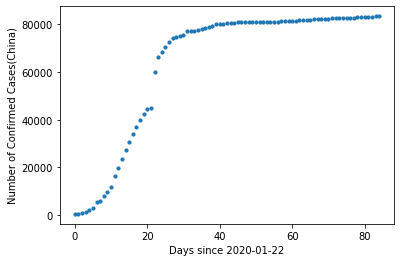

<Figure size 3600x2160 with 0 Axes>

In [48]:
plt.scatter(X, Y, s = 10)
plt.xlabel('Days since 2020-01-22')
plt.ylabel('Number of Confirmed Cases(China)')
plt.figure(figsize=(50, 30))
plt.show()

In [42]:
X = X.reshape(-1, 1)
poly = PolynomialFeatures(degree = 2)
X_2 = poly.fit_transform(X)
model = linear_model.LinearRegression()
model = model.fit(X_2, Y)
score = model.score(X_2, Y)
Y_2 = model.predict(poly.transform(X))
print("R2 Score for poly degree = 2 model is", score)

R2 Score for poly degree = 2 model is 0.9417548808022026


In [49]:
poly = PolynomialFeatures(degree = 3)
X_3 = poly.fit_transform(X)
model = linear_model.LinearRegression()
model = model.fit(X_3, Y)
score = model.score(X_3, Y)
Y_3 = model.predict(poly.transform(X))
print("R2 Score for poly degree = 3 model is", score)

R2 Score for poly degree = 3 model is 0.9628813330383547


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


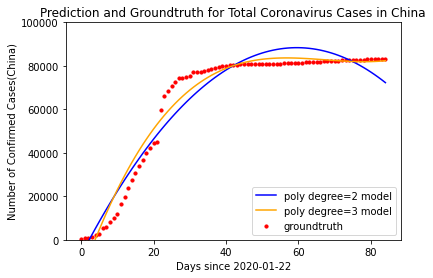

In [52]:
plt.scatter(X, Y, color = "red", s = 10, label = "groundtruth")
plt.plot(X, Y_2, color = "blue", label = "poly degree=2 model")
plt.plot(X, Y_3, color = "orange", label = "poly degree=3 model")
plt.ylim(0, 100000)
plt.title('Prediction and Groundtruth for Total Coronavirus Cases in China')
plt.xlabel('Days since 2020-01-22')
plt.ylabel('Number of Confirmed Cases(China)')
ax = plt.subplot(111)
ax.legend()
plt.show()
